<a href="https://colab.research.google.com/github/ashkanallahyari/market_basket_analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle - Market Basket Analysis
https://www.kaggle.com/datasets/aslanahmedov/market-basket-analysis/data

## Downloading data

New to Kaggle API? Here's how to [set up your API keys](https://www.kaggle.com/docs/api#authentication).

In [1]:
# Uploading personal kaggle API

# !pip install kagglehub[pandas-datasets]
from google.colab import files
files.upload()

import os
import shutil

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)

Saving kaggle.json to kaggle.json


In [23]:
# Hide warnings in Google Colab
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Downloading the dataset
# !pip install kaggle
!kaggle datasets download -d aslanahmedov/market-basket-analysis

Dataset URL: https://www.kaggle.com/datasets/aslanahmedov/market-basket-analysis
License(s): copyright-authors
  0% 0.00/22.8M [00:00<?, ?B/s]
100% 22.8M/22.8M [00:00<00:00, 1.01GB/s]


In [4]:
# Unzipping the dataset
import zipfile

with zipfile.ZipFile("market-basket-analysis.zip", "r") as zip_ref:
    zip_ref.extractall("market_basket_data")

## Extracting data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
raw_data = pd.read_csv("/content/market_basket_data/Assignment-1_Data.csv", sep=";")

# Setting the data type
raw_data["Price"] = raw_data["Price"].str.strip().str.replace(",", ".", regex=False)
raw_data["Price"] = pd.to_numeric(raw_data["Price"], errors="coerce")
raw_data["CustomerID"] = pd.to_numeric(raw_data["CustomerID"], errors="coerce").astype("Int64")
raw_data["Date"] = pd.to_datetime(raw_data["Date"], format='%d.%m.%Y %H:%M')

# Extracting Year and Month and Hours
raw_data["Year"] = raw_data["Date"].dt.year
raw_data["Month"] = raw_data["Date"].dt.month
raw_data["MonthName"] = raw_data["Date"].dt.strftime("%B")
raw_data["DayName"] = raw_data["Date"].dt.day_name()
raw_data["Hour"] = raw_data["Date"].dt.hour

print(f"Data Frame Shape: {raw_data.shape}")
print("-"*50)
raw_data.head()

Data Frame Shape: (522064, 12)
--------------------------------------------------


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,MonthName,DayName,Hour
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,December,Wednesday,8
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,December,Wednesday,8
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,December,Wednesday,8
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,December,Wednesday,8
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,December,Wednesday,8


In [51]:
# Checking the datatypes and number of null records
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  Int64         
 6   Country     522064 non-null  object        
 7   Year        522064 non-null  int32         
 8   Month       522064 non-null  int32         
 9   MonthName   522064 non-null  object        
 10  DayName     522064 non-null  object        
 11  Hour        522064 non-null  int32         
dtypes: Int64(1), datetime64[ns](1), float64(1), int32(3), int64(1), object(5)
memory usage: 42.3+ MB


## Data Understanding and Transformation

In [52]:
# Copying the data and cleaning it
df = raw_data.copy()
df.describe()

,Quantity,Date,Price,CustomerID,Year,Month,Hour
count,522064.000000,522064,522064.000000,388023.0,522064.000000,522064.000000,522064.000000
mean,10.090435,2011-07-04 12:51:20.777107456,3.826801,15316.93171,2010.921002,7.559108,13.102472
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.0,2010.000000,1.000000,6.000000
25%,1.000000,2011-03-28 10:15:00,1.250000,13950.0,2011.000000,5.000000,11.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15265.0,2011.000000,8.000000,13.000000
75%,10.000000,2011-10-19 14:12:00,4.130000,16837.0,2011.000000,11.000000,15.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.0,2011.000000,12.000000,20.000000
std,161.110525,NaN,41.900599,1721.846964,0.269736,3.514943,2.430530


In [53]:
# Description of qualitative fields
df[["BillNo", "Itemname", "Country"]].describe()

,BillNo,Itemname,Country
count,522064,520609,522064
unique,21665,4185,30
top,573585,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2269,487622


Some prices are negative which based on the Itenname, it is obvious that they were debt adjustment (maybe order cancellations). They are just two records so I removed them.
Some items in the order is null.
some orders have zero or negative quantity.

In [54]:
print(f"Number of orders with negative price: {len(raw_data[raw_data["Price"] < 0])}")
print(f"Number of orders with null item list: {len(raw_data[raw_data["Itemname"].isnull()])}")
print(f"Number of orders with zero or negative quantity: {len(raw_data[raw_data["Quantity"] <= 0])}")

Number of orders with negative price: 2
Number of orders with null item list: 1455
Number of orders with zero or negative quantity: 1336


Most of the orders were in the United Kingdom

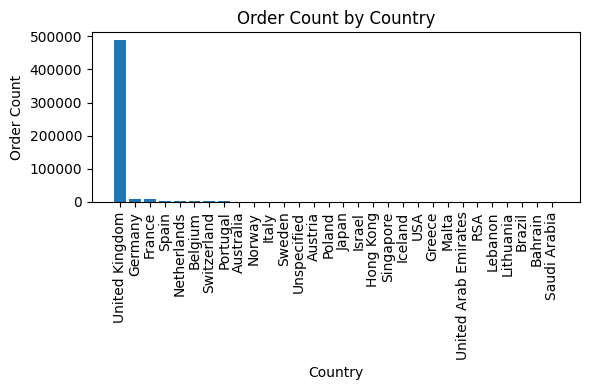

In [55]:
# Count orders per country
country_counts = df["Country"].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(country_counts.index, country_counts.values)

plt.title("Order Count by Country")
plt.xlabel("Country")
plt.ylabel("Order Count")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Most of the orders took place in October, November and December.

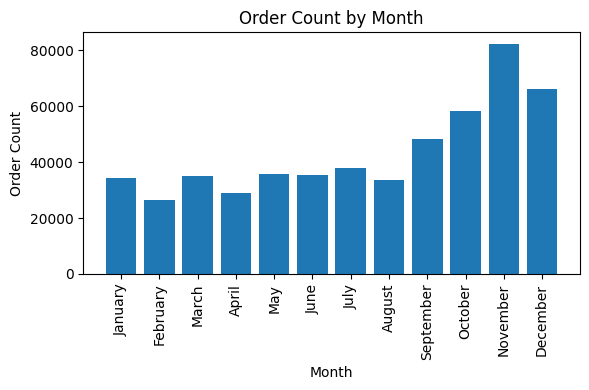

In [62]:
# Count orders per month
# Define the correct calendar order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

month_counts = df["MonthName"].value_counts()
month_counts = month_counts.reindex(month_order)

plt.figure(figsize=(6, 4))
plt.bar(month_counts.index, month_counts.values)

plt.title("Order Count by Month")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

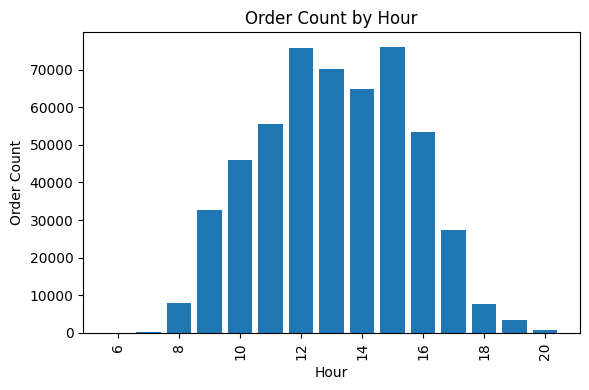

In [63]:
# Count orders per Hour
hour_counts = df["Hour"].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(hour_counts.index, hour_counts.values)

plt.title("Order Count by Hour")
plt.xlabel("Hour")
plt.ylabel("Order Count")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

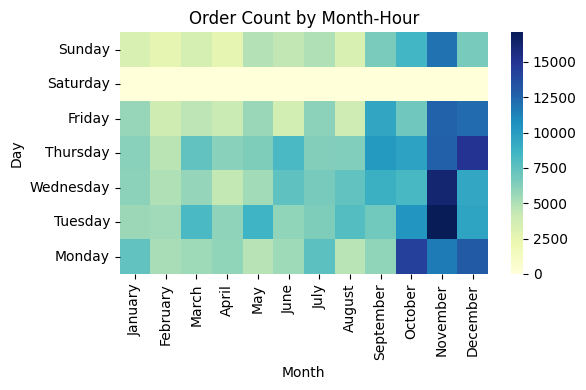

In [66]:
# Order per month per day
# Define correct calendar and weekday order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
day_order = ["Sunday", "Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday"]

df_month_day = df.groupby(["MonthName", "DayName"]).size().reset_index(name="Count")
df_month_day = df_month_day.pivot(index="DayName", columns="MonthName", values="Count")
df_month_day = df_month_day.reindex(index=day_order, columns=month_order, fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(df_month_day, cmap="YlGnBu")

plt.title("Order Count by Month-Hour")
plt.xlabel("Month")
plt.ylabel("Day")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

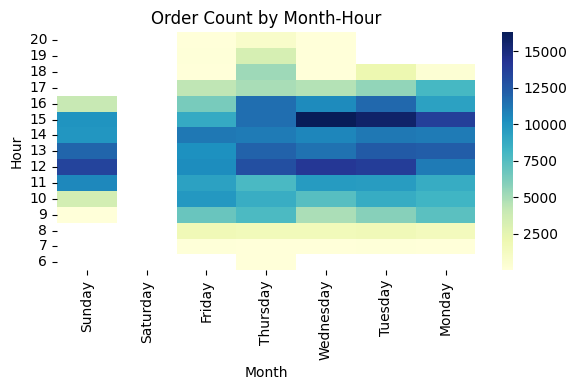

In [76]:
# Order per day per hour
day_order = ["Sunday", "Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday"]

df_day_hour = df.groupby(["DayName", "Hour"]).size().reset_index(name="Count")
df_day_hour = df_day_hour.pivot(index="Hour", columns="DayName", values="Count")
df_day_hour = df_day_hour.reindex(columns=day_order)
df_day_hour = df_day_hour.sort_index(ascending=False)

plt.figure(figsize=(6, 4))
sns.heatmap(df_day_hour, cmap="YlGnBu")

plt.title("Order Count by Month-Hour")
plt.xlabel("Month")
plt.ylabel("Hour")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

## Data Prepration

Cleaning the data

In [77]:
# Removing orders with negative price
print(f"Number of orders with negative price: {len(df[df['Price'] < 0])}")
df = df[df["Price"] >= 0]

# Removing orders with null items
print(f"Number of orders with null item list: {len(df[df['Itemname'].isnull()])}")
df = df[df["Itemname"].notnull()]

# Removing orders with zero or negative Quantity
print(f"Number of orders with zero or negative quantity: {len(df[df['Quantity'] < 0])}")
df = df[df["Quantity"] > 0]

# Just focusing iin United Kingdom
df = df[df["Country"] == "United Kingdom"]

print(f"DataFrame Shape: {df.shape}")

Number of orders with negative price: 2
Number of orders with null item list: 1455
Number of orders with zero or negative quantity: 473
DataFrame Shape: (485692, 12)


Creating the One-Hot encoded matrix

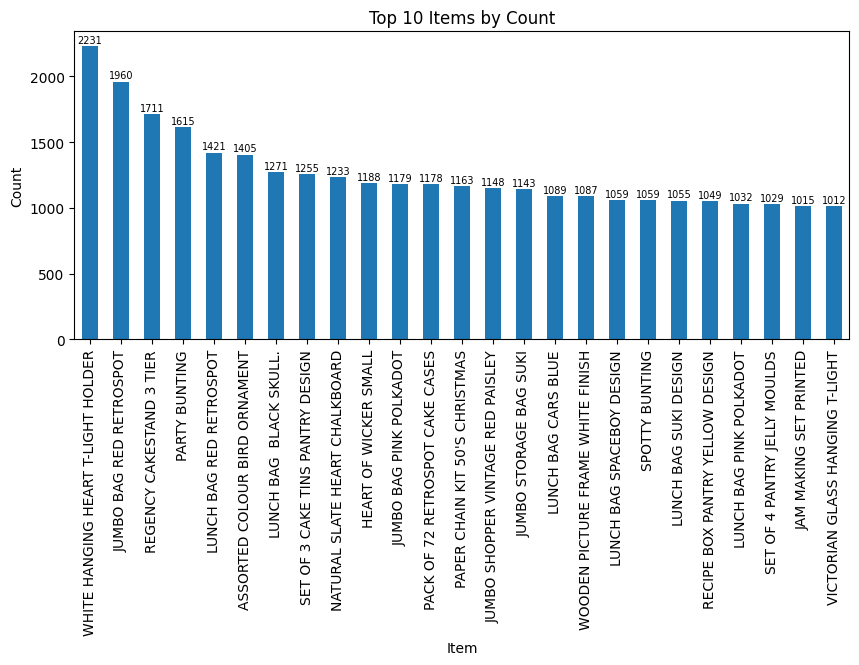

In [78]:
item_counts = df["Itemname"].value_counts()[:25]

plt.figure(figsize=(10, 4))
item_counts.plot(kind='bar')

plt.title("Top 10 Items by Count")
plt.xlabel("Item")
plt.ylabel("Count")
plt.xticks(rotation=90)

for i, count in enumerate(item_counts):
  plt.text(i, count+25, str(count), ha='center', fontsize=7)

plt.show()

In [79]:
basket_matrix = pd.crosstab(df['BillNo'], df['Itemname'])

# Filter orders with at least M items bought (tune M to reduce dataset size if needed)
M = 1
basket_matrix = basket_matrix[basket_matrix.sum(axis=1) >= M]

basket_matrix = basket_matrix.astype(bool)

print(basket_matrix.shape)
basket_matrix.head()

(18194, 4046)


Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Applying Frequent Itemsets and Association Rules

In [81]:
from mlxtend.frequent_patterns import apriori, association_rules

# Frequent itemsets
freq_items = apriori(basket_matrix, min_support=0.01, use_colnames=True, max_len=3, low_memory=True, verbose=0)
print(freq_items.sort_values('support', ascending=False).head(25))

      support                              itemsets
778  0.119050  (WHITE HANGING HEART T-LIGHT HOLDER)
355  0.106519             (JUMBO BAG RED RETROSPOT)
560  0.092613            (REGENCY CAKESTAND 3 TIER)
471  0.087611                       (PARTY BUNTING)
395  0.076509             (LUNCH BAG RED RETROSPOT)
54   0.075355       (ASSORTED COLOUR BIRD ORNAMENT)
628  0.068209    (SET OF 3 CAKE TINS PANTRY DESIGN)
424  0.067000      (NATURAL SLATE HEART CHALKBOARD)
387  0.066835             (LUNCH BAG  BLACK SKULL.)
307  0.063977               (HEART OF WICKER SMALL)
353  0.063702             (JUMBO BAG PINK POLKADOT)
364  0.062273   (JUMBO SHOPPER VINTAGE RED PAISLEY)
366  0.062108              (JUMBO STORAGE BAG SUKI)
450  0.062053     (PACK OF 72 RETROSPOT CAKE CASES)
464  0.061834      (PAPER CHAIN KIT 50'S CHRISTMAS)
796  0.059140   (WOODEN PICTURE FRAME WHITE FINISH)
390  0.058536                 (LUNCH BAG CARS BLUE)
705  0.057217                      (SPOTTY BUNTING)
396  0.05705

In [82]:
# Association rules
rules = association_rules(freq_items, metric='lift', min_threshold=1.0)
rules = rules.sort_values(['lift','confidence'], ascending=[False, False])
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2608,(HERB MARKER THYME),"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",0.012642,0.011377,0.010828,0.856522,75.282882,1.0,0.010684,6.890400,0.999350,0.820833,0.854871,0.904106
2605,"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",(HERB MARKER THYME),0.011377,0.012642,0.010828,0.951691,75.282882,1.0,0.010684,20.438320,0.998072,0.820833,0.951072,0.904106
2600,"(HERB MARKER THYME, HERB MARKER MINT)",(HERB MARKER ROSEMARY),0.010993,0.012696,0.010498,0.955000,75.217619,1.0,0.010358,21.940078,0.997672,0.795833,0.954421,0.890920
2601,(HERB MARKER ROSEMARY),"(HERB MARKER THYME, HERB MARKER MINT)",0.012696,0.010993,0.010498,0.826840,75.217619,1.0,0.010358,5.711518,0.999394,0.795833,0.824915,0.890920
2596,(HERB MARKER PARSLEY),"(HERB MARKER THYME, HERB MARKER MINT)",0.012532,0.010993,0.010333,0.824561,75.010351,1.0,0.010195,5.637342,0.999190,0.783333,0.822611,0.882281
2593,"(HERB MARKER THYME, HERB MARKER MINT)",(HERB MARKER PARSLEY),0.010993,0.012532,0.010333,0.940000,75.010351,1.0,0.010195,16.457807,0.997635,0.783333,0.939239,0.882281
2606,"(HERB MARKER THYME, HERB MARKER PARSLEY)",(HERB MARKER ROSEMARY),0.011377,0.012696,0.010828,0.951691,74.956982,1.0,0.010683,20.437183,0.998014,0.817427,0.951070,0.902252
2607,(HERB MARKER ROSEMARY),"(HERB MARKER THYME, HERB MARKER PARSLEY)",0.012696,0.011377,0.010828,0.852814,74.956982,1.0,0.010683,6.716818,0.999347,0.817427,0.851120,0.902252
2582,"(HERB MARKER BASIL, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.011158,0.012696,0.010608,0.950739,74.882008,1.0,0.010466,20.042261,0.997778,0.800830,0.950105,0.893118
2583,(HERB MARKER ROSEMARY),"(HERB MARKER BASIL, HERB MARKER THYME)",0.012696,0.011158,0.010608,0.835498,74.882008,1.0,0.010466,6.011121,0.999334,0.800830,0.833642,0.893118


In [84]:
filtered_rules = rules[
    (rules['support'] > 0.01) &
    (rules['confidence'] > 0.25) &
    (rules['lift'] > 1.2)
]
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2608,(HERB MARKER THYME),"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",0.012642,0.011377,0.010828,0.856522,75.282882,1.0,0.010684,6.890400,0.999350,0.820833,0.854871,0.904106
2605,"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",(HERB MARKER THYME),0.011377,0.012642,0.010828,0.951691,75.282882,1.0,0.010684,20.438320,0.998072,0.820833,0.951072,0.904106
2600,"(HERB MARKER THYME, HERB MARKER MINT)",(HERB MARKER ROSEMARY),0.010993,0.012696,0.010498,0.955000,75.217619,1.0,0.010358,21.940078,0.997672,0.795833,0.954421,0.890920
2601,(HERB MARKER ROSEMARY),"(HERB MARKER THYME, HERB MARKER MINT)",0.012696,0.010993,0.010498,0.826840,75.217619,1.0,0.010358,5.711518,0.999394,0.795833,0.824915,0.890920
2596,(HERB MARKER PARSLEY),"(HERB MARKER THYME, HERB MARKER MINT)",0.012532,0.010993,0.010333,0.824561,75.010351,1.0,0.010195,5.637342,0.999190,0.783333,0.822611,0.882281


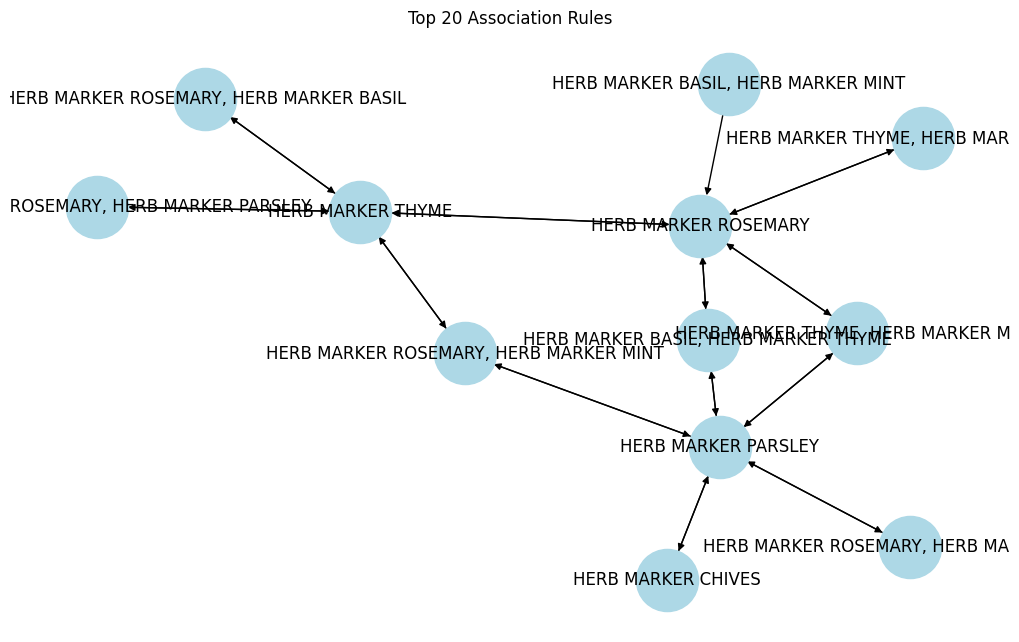

In [89]:
import matplotlib.pyplot as plt
import networkx as nx

top_rules = filtered_rules.head(25)

G = nx.DiGraph()
for _, row in top_rules.iterrows():
    a = ', '.join(list(row['antecedents']))
    b = ', '.join(list(row['consequents']))
    G.add_edge(a, b, weight=row['lift'])

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', arrows=True)
plt.title('Top 20 Association Rules')
plt.show()